In [1]:
%matplotlib inline

import os
import sys

PACKAGE_PARENT = '..'
sys.path.append(PACKAGE_PARENT)

import torch
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from gaminet import GAMINetRegressor
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

## Load data

In [2]:
from dataset import *
random_state = 1
train_x, test_x, train_y, test_y, task_type, meta_info, get_metric = get_bike_share(random_state)

## Compare with EBM

In [3]:
from interpret.glassbox import ExplainableBoostingRegressor

clf = ExplainableBoostingRegressor(interactions=10)
clf.fit(train_x, train_y)

pred_train = clf.predict(train_x)
pred_test = clf.predict(test_x)
ebm_stat = np.hstack([np.round(get_metric(train_y, pred_train),5),
                      np.round(get_metric(test_y, pred_test),5)])
print(ebm_stat)

[83.09317 85.30501]


## Train GAMI-Net 

In [4]:
model = GAMINetRegressor(interact_num=10,
                         meta_info=meta_info,
                         subnet_size_main_effect=[20] * 1,
                         subnet_size_interaction=[20] * 2,
                         max_epochs=[1000, 1000, 1000],
                         learning_rates=[0.001, 0.001, 0.0001],
                         early_stop_thres=["auto", "auto", "auto"],
                         batch_size=1000,
                         reg_clarity=0.1,
                         loss_threshold=0.01,
                         normalize=True,
                         warm_start=True,
                         verbose=True,
                         random_state=random_state)
model.fit(train_x, train_y)

####################Stage 1: Main Effect Training####################
###############Run Warm Initialization for Main Effect###############


Epoch:    1, train loss: 0.01542, validation loss: 0.01470: 100%|██████████| 12/12 [00:00<00:00, 62.80it/s]                        
Epoch:    2, train loss: 0.01532, validation loss: 0.01468: 100%|██████████| 12/12 [00:00<00:00, 230.30it/s]                       
Epoch:    3, train loss: 0.01525, validation loss: 0.01467: 100%|██████████| 12/12 [00:00<00:00, 230.55it/s]                       
Epoch:    4, train loss: 0.01523, validation loss: 0.01467: 100%|██████████| 12/12 [00:00<00:00, 229.78it/s]                       
Epoch:    5, train loss: 0.01520, validation loss: 0.01470: 100%|██████████| 12/12 [00:00<00:00, 230.06it/s]                       
Epoch:    6, train loss: 0.01518, validation loss: 0.01475: 100%|██████████| 12/12 [00:00<00:00, 229.31it/s]                       
Epoch:    7, train loss: 0.01521, validation loss: 0.01470: 100%|██████████| 12/12 [00:00<00:00, 230.53it/s]                       
Epoch:    8, train loss: 0.01520, validation loss: 0.01471: 100%|██████████|

Main Effect Training Stop at Epoch: 30, train loss: 0.01520, validation loss: 0.01463
####################Stage 2: Interaction Training####################
###############Run Warm Initialization for Interaction###############


Epoch:    1, train loss: 0.02406, validation loss: 0.01248: 100%|██████████| 12/12 [00:00<00:00, 28.77it/s]                        
Epoch:    2, train loss: 0.01106, validation loss: 0.00964: 100%|██████████| 12/12 [00:00<00:00, 73.63it/s]                        
Epoch:    3, train loss: 0.00849, validation loss: 0.00753: 100%|██████████| 12/12 [00:00<00:00, 73.52it/s]                        
Epoch:    4, train loss: 0.00755, validation loss: 0.00723: 100%|██████████| 12/12 [00:00<00:00, 73.03it/s]                        
Epoch:    5, train loss: 0.00712, validation loss: 0.00679: 100%|██████████| 12/12 [00:00<00:00, 73.30it/s]                        
Epoch:    6, train loss: 0.00688, validation loss: 0.00663: 100%|██████████| 12/12 [00:00<00:00, 73.38it/s]                        
Epoch:    7, train loss: 0.00671, validation loss: 0.00649: 100%|██████████| 12/12 [00:00<00:00, 73.41it/s]                        
Epoch:    8, train loss: 0.00658, validation loss: 0.00638: 100%|██████████|

Epoch:   63, train loss: 0.00540, validation loss: 0.00543: 100%|██████████| 12/12 [00:00<00:00, 72.25it/s]                        
Epoch:   64, train loss: 0.00542, validation loss: 0.00541: 100%|██████████| 12/12 [00:00<00:00, 73.89it/s]                        
Epoch:   65, train loss: 0.00541, validation loss: 0.00547: 100%|██████████| 12/12 [00:00<00:00, 73.76it/s]                        


Interaction Training Stop at Epoch: 65, train loss: 0.00541, validation loss: 0.00547
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.00537, validation loss: 0.00541: 100%|██████████| 12/12 [00:00<00:00, 73.56it/s]                        
Epoch:    2, train loss: 0.00536, validation loss: 0.00538: 100%|██████████| 12/12 [00:00<00:00, 73.00it/s]                        
Epoch:    3, train loss: 0.00535, validation loss: 0.00538: 100%|██████████| 12/12 [00:00<00:00, 72.65it/s]                        
Epoch:    4, train loss: 0.00534, validation loss: 0.00537: 100%|██████████| 12/12 [00:00<00:00, 73.21it/s]                        
Epoch:    5, train loss: 0.00533, validation loss: 0.00536: 100%|██████████| 12/12 [00:00<00:00, 73.27it/s]                        
Epoch:    6, train loss: 0.00533, validation loss: 0.00537: 100%|██████████| 12/12 [00:00<00:00, 72.84it/s]                        
Epoch:    7, train loss: 0.00532, validation loss: 0.00536: 100%|██████████| 12/12 [00:00<00:00, 73.42it/s]                        
Epoch:    8, train loss: 0.00532, validation loss: 0.00535: 100%|██████████|

Fine Tuning Stop at Epoch: 20, train loss: 0.00531, validation loss: 0.00534


In [5]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train),5),
                          np.round(get_metric(test_y, pred_test),5)])
print(gaminet_stat)

[71.0459  73.39695]


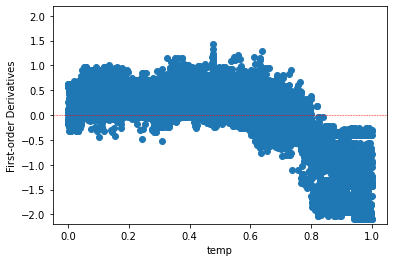

In [6]:
model.partial_derivatives(6)

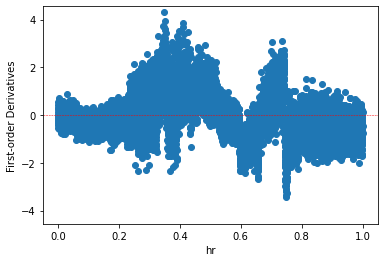

In [7]:
model.partial_derivatives(2)

In [8]:
model.get_mono_loss(train_x), model.certify_mono(n_samples=10000)

(0.0, True)

In [9]:
model.get_clarity_loss(test_x)

0.0005671450635418296

## Visualization

In [10]:
simu_dir = "./results/"
if not os.path.exists(simu_dir):
    os.makedirs(simu_dir)

Training details

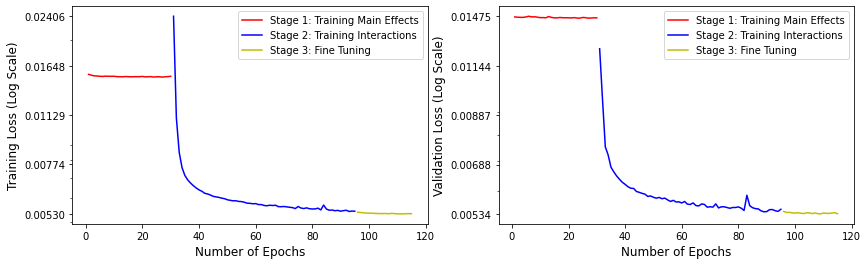

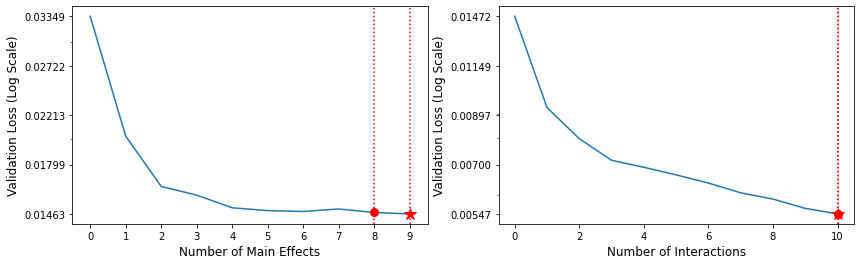

In [11]:
data_dict_logs = model.summary_logs(save_dict=False)
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

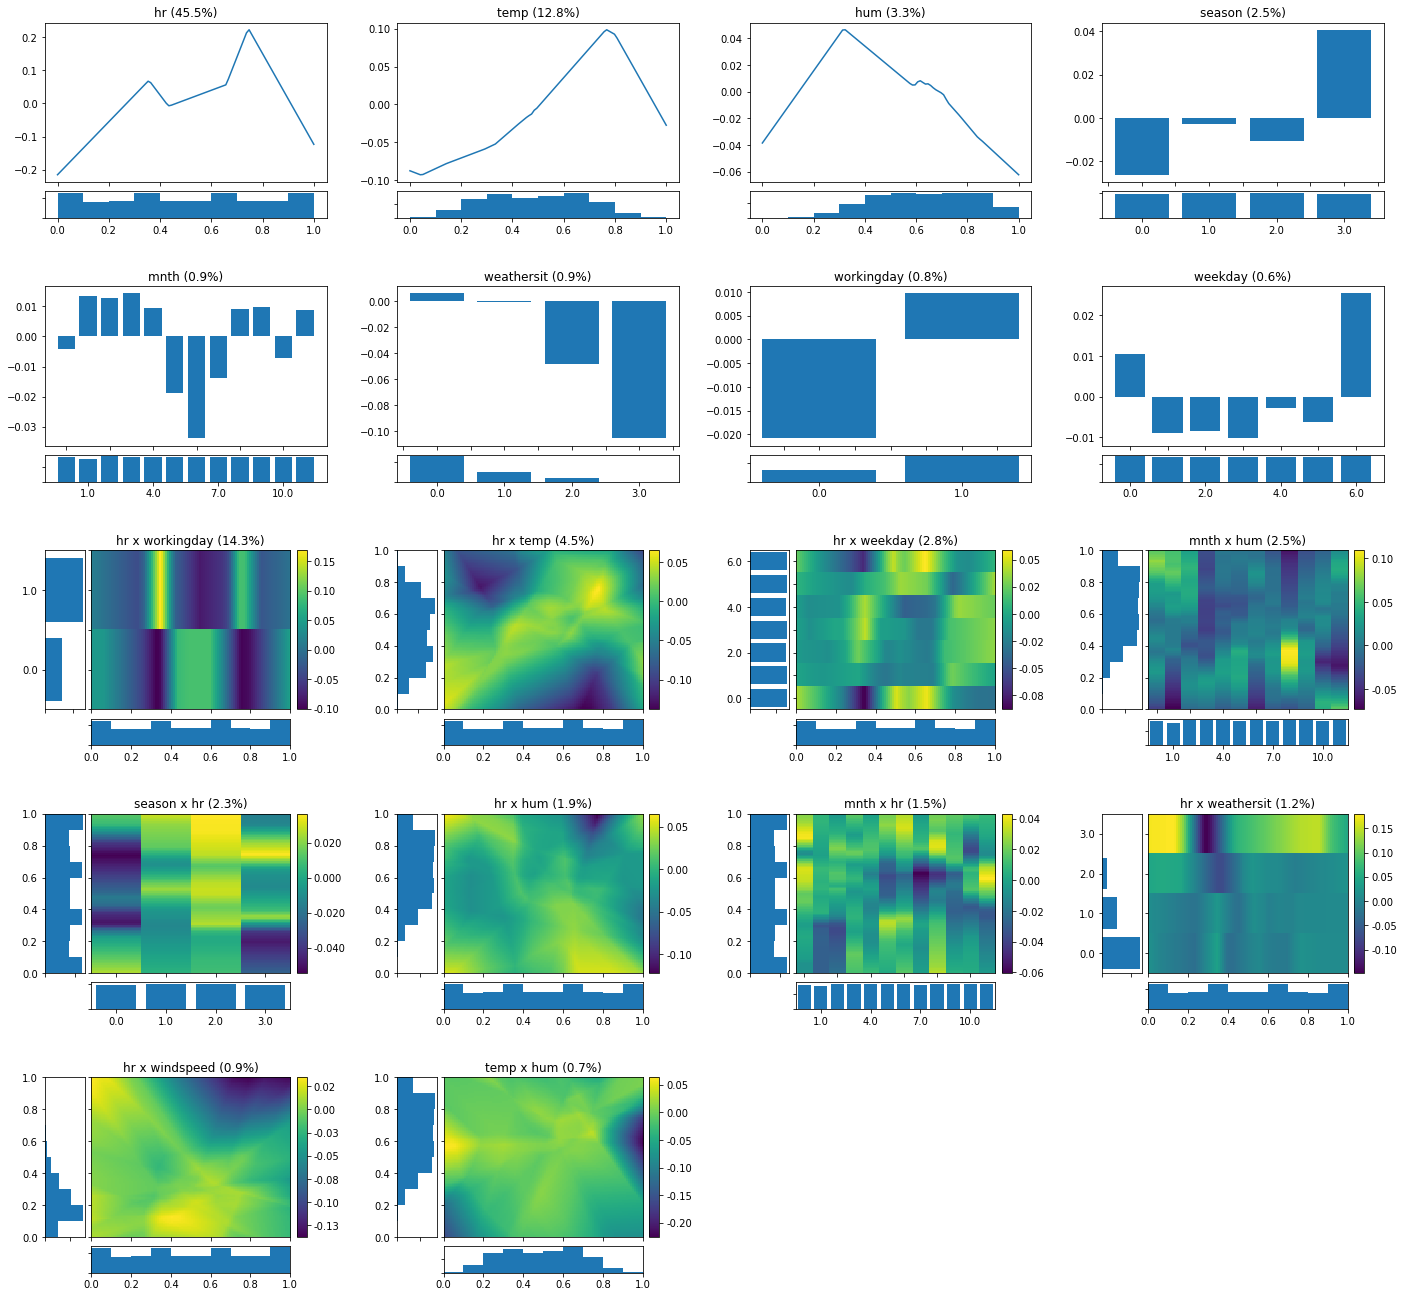

In [12]:
data_dict_global = model.global_explain(save_dict=False)
global_visualize_density(data_dict_global, main_effect_num=10, interaction_num=10, cols_per_row=4, save_png=True, save_eps=True)

Feature Importance

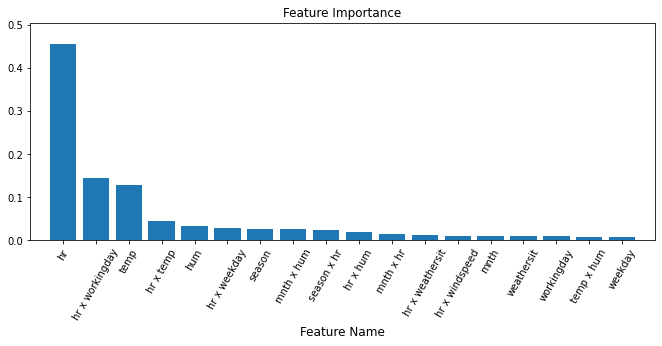

In [13]:
feature_importance_visualize(data_dict_global, save_png=True, folder=simu_dir, name='s1_feature')

Local Visualization

In [14]:
data_dict_local = model.local_explain(train_x[:10], train_y[:10], save_dict=False)

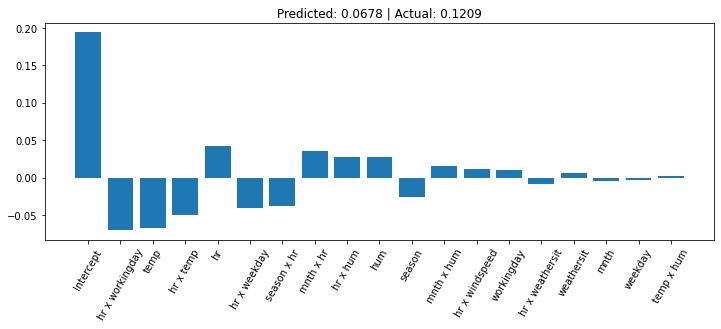

In [15]:
local_visualize(data_dict_local[0], save_png=True, folder=simu_dir, name='s1_local')